# =======================================
# HOUSE PRICES EXPLORATORY DATA ANALYSIS
# =======================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### =============================================
### 1. INTRODUCTION
### =============================================


DATASET: 
Kaggle House Prices

ABOUT: 
This dataset contains 79 explanatory variables describing various aspects 
of residential homes in Ames, Iowa. Our goal is to predict the final sale price.

QUESTIONS TO ANSWER:
1. What features have the strongest relationship with house prices?
2. How do different neighborhoods compare in pricing?
3. Does house age significantly impact price?
4. Which categorical features matter most for pricing?
5. Are there any surprising patterns in the data?


In [2]:
# Load data
df = pd.read_csv('house_prices.csv')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### =============================================
### 2. DATA OVERVIEW
### =============================================

In [3]:
# Shape of data
print("=" * 80)
print("DATASET SHAPE")
print("=" * 80)
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

# Preview the data
print("\n" + "=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
display(df.head())

# Basic information
print("\n" + "=" * 80)
print("DATA TYPES & NON-NULL COUNTS")
print("=" * 80)
display(df.info())

# Statistical summary of numerical columns
print("\n" + "=" * 80)
print("NUMERICAL FEATURES SUMMARY")
print("=" * 80)
display(df.describe())

DATASET SHAPE
Rows: 1460
Columns: 81

FIRST 5 ROWS


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



DATA TYPES & NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 no

None


NUMERICAL FEATURES SUMMARY


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2.1 Columns type and target variable analysys

Numerical columns:  38
Categorical columns:  43

Target variable analysis:
 count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Highest Sale Price:  755000
Lowest Sale Price:  34900


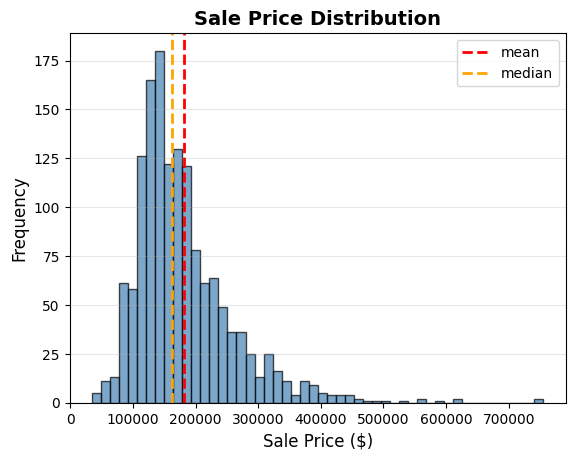

In [4]:
# Columns type
numerical = df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical = df.select_dtypes(include='object').columns.to_list()

# Target variable analysys
target_a = df['SalePrice'].describe()
highest_sale_price = max(df['SalePrice'])
lowest_sale_price = min(df['SalePrice'])

# Prints
print("Numerical columns: ", len(numerical))
print("Categorical columns: ", len(categorical))
print("\nTarget variable analysis:\n", target_a)
print("\nHighest Sale Price: ", highest_sale_price)
print("Lowest Sale Price: ", lowest_sale_price)

# Sale Price Distribution Histogram
plt.hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sale Price Distribution', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
mean_sale = df['SalePrice'].mean()
median_sale = df['SalePrice'].median()
plt.axvline(mean_sale, color='red', linestyle='--', linewidth=2, label='mean')
plt.axvline(median_sale, color='orange', linestyle='--', linewidth=2, label='median')
plt.legend()
plt.savefig('plots/saleprice_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### =============================================
### 3. Data Cleaning
### =============================================

- First we will have look on missing values and missing columns

Columns with missing values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


,Missing values,Missing %
Column,,
PoolQC,1453,99.521
MiscFeature,1406,96.301
Alley,1369,93.767
Fence,1179,80.753
MasVnrType,872,59.726
FireplaceQu,690,47.260
LotFrontage,259,17.740
GarageType,81,5.548
GarageYrBlt,81,5.548


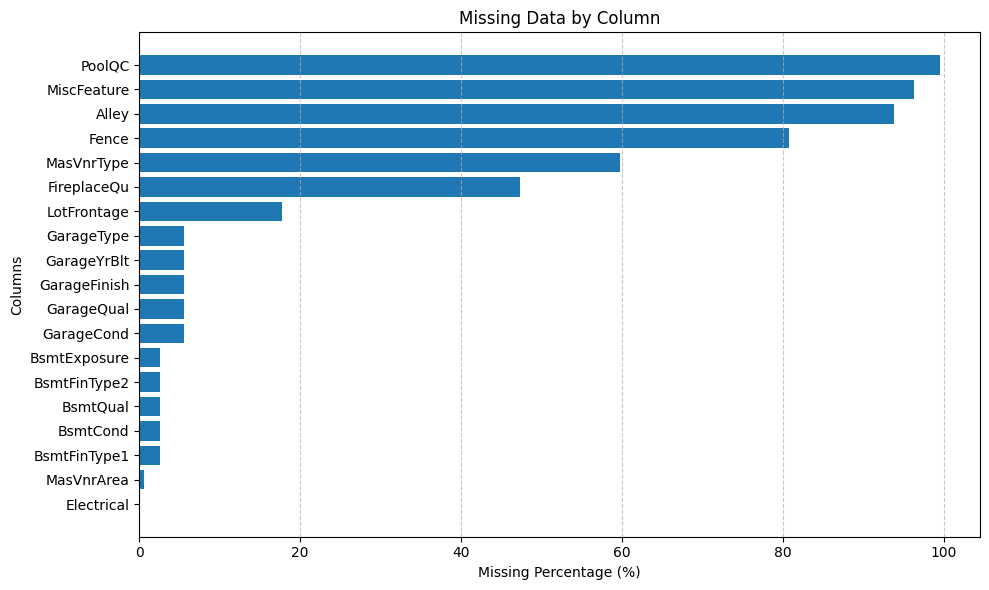

In [5]:
# Cols with missing values
missing_values_by_cols = df.isnull().sum()
missing_values_by_cols = missing_values_by_cols[missing_values_by_cols > 0]


# Missing percentage in columns
missing_percent = (missing_values_by_cols / df.shape[0]) * 100

missing_summary = pd.DataFrame({'Missing values': missing_values_by_cols, 'Missing %':missing_percent}).sort_values(by='Missing %', ascending=False)

missing_summary['Missing %'] = missing_summary['Missing %'].round(3)
missing_summary.index.name = 'Column'

# Prints
print("Columns with missing values:\n", missing_values_by_cols)
display(missing_summary)


# Plot the missing summary
plt.figure(figsize=(10, 6))
plt.barh(
    missing_summary.index,
    missing_summary['Missing %'],
)
plt.xlabel('Missing Percentage (%)')
plt.ylabel('Columns')
plt.title('Missing Data by Column')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('plots/missing_data.png', dpi=300, bbox_inches='tight')  
plt.show()


- We can see that 99.52% of PoolQC which is pool quality value is missing se we can drop it and together with it, it makes sense that we also drop column PoolArea since 99.52% of houses doesnt have pools based on PoolQC column

- By same logic we are dropping also columns:
1. MiscFeature and MiscVal - Very few properties have misc features so we are dropping both
2. Alley - Most houses don’t have alley access
3. Fence - Could hold minor predictive info, but mostly missing

In [6]:
# We will work with copy of original dataset now
df_cleaned = df.copy()

columns_dropped = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence']
df_cleaned = df_cleaned.drop(columns=columns_dropped)

- In next step we will replace NaN values in MasVnrType (Masonry veneer type) column for None values because houses with no veneer often tend to be cheaper and by marking 'None' explicitly Tree-based models can split on “Is there veneer or not?”

In [7]:
df_cleaned['MasVnrType'] = df_cleaned['MasVnrType'].fillna('None')

- We will select columns whose values represent quality ratings (like ‘Ex’, ‘Gd’, ‘TA’, etc.), so that we can map them to integers.

In [8]:
# 1. Select quality/condition columns
qu_columns = df_cleaned.columns[df_cleaned.isin(['Ex','Gd','TA','Fa','Po']).any()]
print(qu_columns)

# 2. Drop BsmtExposure
qu_columns = qu_columns.drop('BsmtExposure')  # reassign

# 3. Fill missing values and map to integers
quality_mapping = {'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
df_cleaned[qu_columns] = df_cleaned[qu_columns].fillna('None').replace(quality_mapping)

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond'],
      dtype='object')


C:\Users\mHomi\AppData\Local\Temp\ipykernel_24976\3571882553.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[qu_columns] = df_cleaned[qu_columns].fillna('None').replace(quality_mapping)


- Bellow, we can see that all columns with ordinal values has changed to integers for better modeling

In [9]:
display(df[qu_columns].head(10))
display(df_cleaned[qu_columns].head(10))
display(df_cleaned[qu_columns].dtypes)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA
1,TA,TA,Gd,TA,Ex,TA,TA,TA,TA
2,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA
3,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA
4,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA
5,TA,TA,Gd,TA,Ex,TA,NaN,TA,TA
6,Gd,TA,Ex,TA,Ex,Gd,Gd,TA,TA
7,TA,TA,Gd,TA,Ex,TA,TA,TA,TA
8,TA,TA,TA,TA,Gd,TA,TA,Fa,TA
9,TA,TA,TA,TA,Ex,TA,TA,Gd,TA


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond
0,4,3,4,3,5,4,0,3,3
1,3,3,4,3,5,3,3,3,3
2,4,3,4,3,5,4,3,3,3
3,3,3,3,4,4,4,4,3,3
4,4,3,4,3,5,4,3,3,3
5,3,3,4,3,5,3,0,3,3
6,4,3,5,3,5,4,4,3,3
7,3,3,4,3,5,3,3,3,3
8,3,3,3,3,4,3,3,2,3
9,3,3,3,3,5,3,3,4,3


ExterQual      int64
ExterCond      int64
BsmtQual       int64
BsmtCond       int64
HeatingQC      int64
KitchenQual    int64
FireplaceQu    int64
GarageQual     int64
GarageCond     int64
dtype: object

- Lastly we wil treat duplicates

In [10]:
df[df.duplicated(subset=['Id'], keep=False)]
# No duplicated Id's

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### =============================================
### 4. EXPLORATORY DATA ANALYSIS
### =============================================

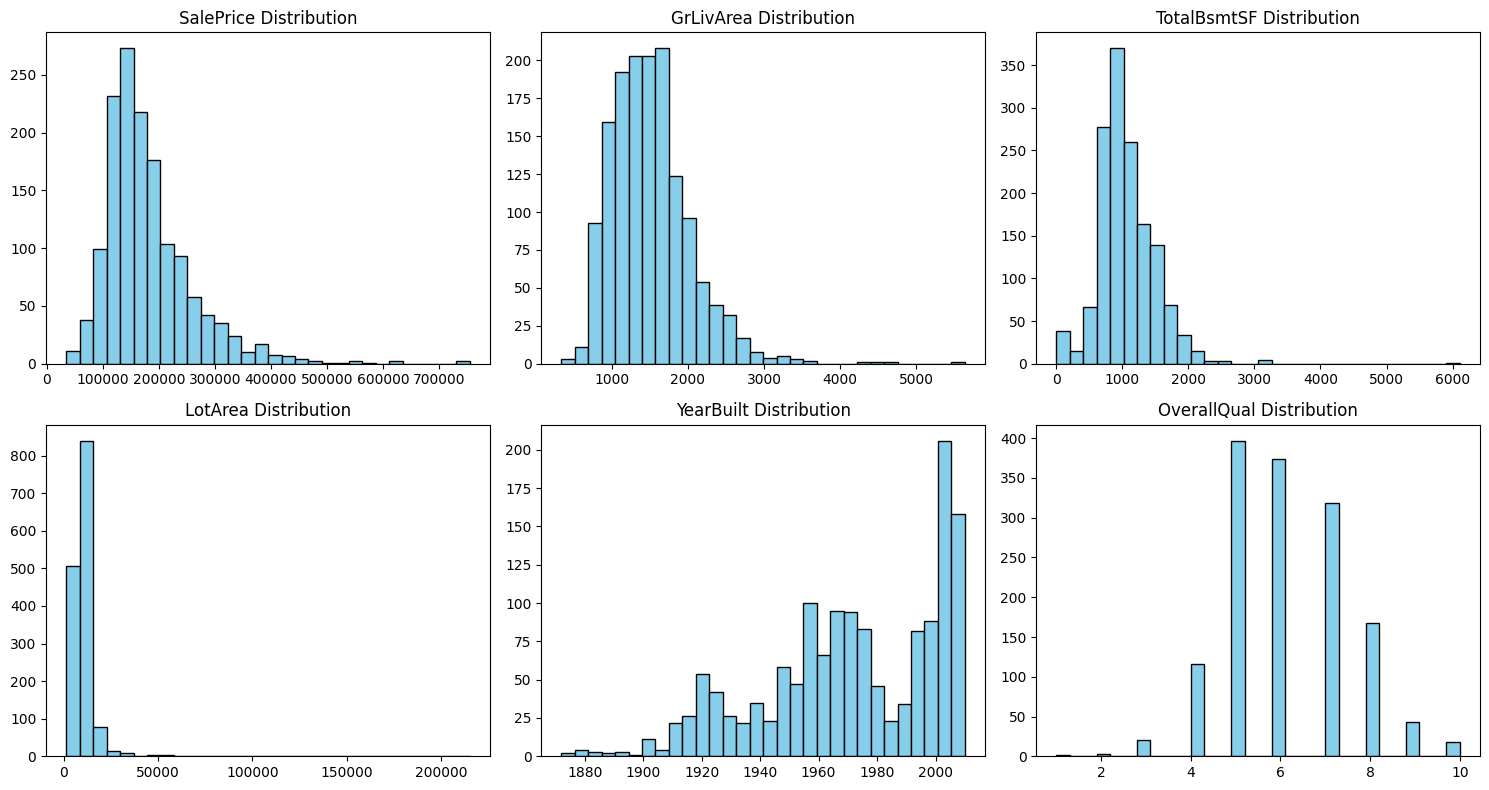

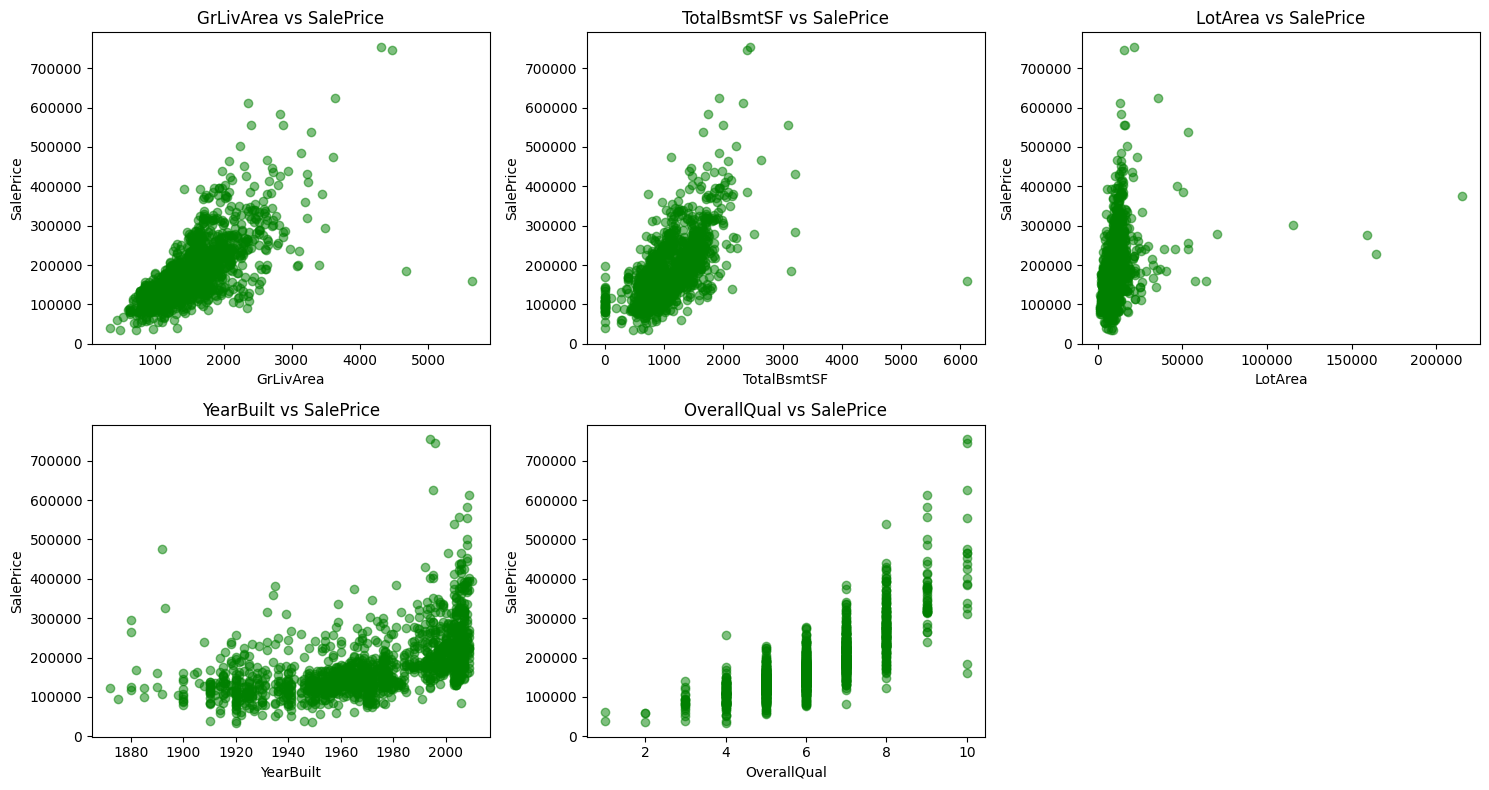

In [11]:
# Histograms: Key features
# Most important numerical/ordinal features for SalePrice
hist_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'LotArea', 'YearBuilt', 'OverallQual']

plt.figure(figsize=(15,8))
for i, col in enumerate(hist_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_cleaned[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.savefig('plots/feature_distributions.png', dpi=300, bbox_inches='tight')  # SAVE FIRST
plt.show()


# Scatter plots vs SalePrice

scatter_features = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'YearBuilt', 'OverallQual']

plt.figure(figsize=(15,8))
for i, col in enumerate(scatter_features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_cleaned[col], df_cleaned['SalePrice'], alpha=0.5, color='green')
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.savefig('plots/scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()


### =============================================
### 5. Insights
### =============================================

##### SalePrice Distribution
- **Right-skewed distribution:** Most houses sell between ~$100k–$300k, but a few very expensive houses (~$700k–$750k) are outliers.
- **Median vs Mean:** Median is slightly lower than the mean, confirming the skew.

##### Key Numerical Features and SalePrice
- **GrLivArea (above-ground living area):** Strong positive correlation with SalePrice — bigger houses tend to be more expensive.
- **TotalBsmtSF (basement size):** Positive trend with SalePrice, though less strong than GrLivArea.
- **LotArea (lot size):** Weak positive trend; very large lots do not always correspond to very high SalePrice.
- **YearBuilt (house age):** Newer houses tend to sell for more, but the relationship is not perfectly linear.
- **OverallQual (overall material/finish quality):** Clear positive relationship — higher quality homes fetch higher prices.

##### Categorical / Ordinal Effects (Encoded as Integers)
- Features like **OverallQual, KitchenQual, and FireplaceQu** strongly influence SalePrice. Houses with high-quality finishes consistently have higher prices.
- Many “None” or low-quality features correspond to lower SalePrice, as expected.

##### Outliers
- A few extremely large houses (`GrLivArea > 4000 sqft`) or expensive houses are visible in scatter plots — potential candidates for removal or special handling in modeling.

##### Surprising Trends / Notes
- **LotArea alone** is not a strong predictor — house size and quality matter much more than the lot itself.
- Some older homes still have high SalePrice due to quality or location.
- Most missing values (like **PoolQC, Fence, Alley**) were for features that are absent in most houses, so dropping them makes sense.
